ART Statistics:
  Bulk Loading - Mean: 3.145s, StdDev: 0.273s
  Candidate Retrieval - Mean: 0.001s, StdDev: 0.003s

Baseline Statistics:
  Bulk Loading - Mean: 3.111s, StdDev: 0.143s
  Candidate Retrieval - Mean: 0.001s, StdDev: 0.004s

A/B Testing Results:
  Bulk Loading - t-statistic: 0.760, p-value: 4.508e-01
  Candidate Retrieval - t-statistic: -0.393, p-value: 6.959e-01
  Bulk Loading: No statistically significant difference.
  Candidate Retrieval: No statistically significant difference.


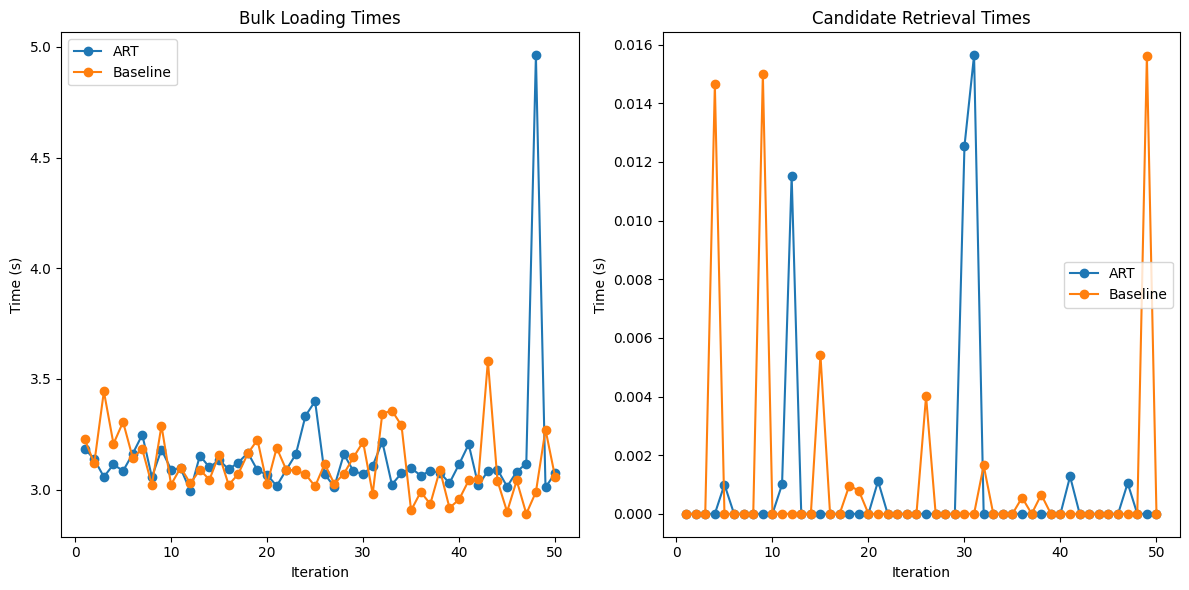

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the CSV files
art_results = pd.read_csv("iteration_results_art.csv")
baseline_results = pd.read_csv("iteration_results.csv")

# Calculate basic statistics
def calculate_statistics(df, label):
    bulk_mean = df["Time_Bulk_Loading"].mean()
    bulk_std = df["Time_Bulk_Loading"].std()
    candidate_mean = df["Time_Candidate_Retrieval"].mean()
    candidate_std = df["Time_Candidate_Retrieval"].std()

    print(f"{label} Statistics:")
    print(f"  Bulk Loading - Mean: {bulk_mean:.3f}s, StdDev: {bulk_std:.3f}s")
    print(f"  Candidate Retrieval - Mean: {candidate_mean:.3f}s, StdDev: {candidate_std:.3f}s")
    print()

    return bulk_mean, bulk_std, candidate_mean, candidate_std

art_bulk_mean, art_bulk_std, art_candidate_mean, art_candidate_std = calculate_statistics(art_results, "ART")
baseline_bulk_mean, baseline_bulk_std, baseline_candidate_mean, baseline_candidate_std = calculate_statistics(baseline_results, "Baseline")

# Perform A/B testing (Paired t-test)
print("A/B Testing Results:")
bulk_t_stat, bulk_p_value = stats.ttest_rel(art_results["Time_Bulk_Loading"], baseline_results["Time_Bulk_Loading"])
candidate_t_stat, candidate_p_value = stats.ttest_rel(art_results["Time_Candidate_Retrieval"], baseline_results["Time_Candidate_Retrieval"])

print(f"  Bulk Loading - t-statistic: {bulk_t_stat:.3f}, p-value: {bulk_p_value:.3e}")
print(f"  Candidate Retrieval - t-statistic: {candidate_t_stat:.3f}, p-value: {candidate_p_value:.3e}")

# Interpret the results
alpha = 0.05
if bulk_p_value < alpha:
    print("  Bulk Loading: Statistically significant difference.")
else:
    print("  Bulk Loading: No statistically significant difference.")

if candidate_p_value < alpha:
    print("  Candidate Retrieval: Statistically significant difference.")
else:
    print("  Candidate Retrieval: No statistically significant difference.")

# Visualization
plt.figure(figsize=(12, 6))

# Bulk Loading Times
plt.subplot(1, 2, 1)
plt.plot(art_results["Iteration"], art_results["Time_Bulk_Loading"], label="ART", marker="o")
plt.plot(baseline_results["Iteration"], baseline_results["Time_Bulk_Loading"], label="Baseline", marker="o")
plt.title("Bulk Loading Times")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

# Candidate Retrieval Times
plt.subplot(1, 2, 2)
plt.plot(art_results["Iteration"], art_results["Time_Candidate_Retrieval"], label="ART", marker="o")
plt.plot(baseline_results["Iteration"], baseline_results["Time_Candidate_Retrieval"], label="Baseline", marker="o")
plt.title("Candidate Retrieval Times")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

plt.tight_layout()
plt.show()

ART2 Statistics:
  Bulk Loading - Mean: 3.146s, StdDev: 0.129s
  Candidate Retrieval - Mean: 0.002s, StdDev: 0.004s

Baseline2 Statistics:
  Bulk Loading - Mean: 3.078s, StdDev: 0.343s
  Candidate Retrieval - Mean: 0.001s, StdDev: 0.002s

A/B Testing Results for new query:
  Bulk Loading - t-statistic: 1.278, p-value: 2.074e-01
  Candidate Retrieval - t-statistic: 1.899, p-value: 6.353e-02
  Bulk Loading: No statistically significant difference.
  Candidate Retrieval: No statistically significant difference.


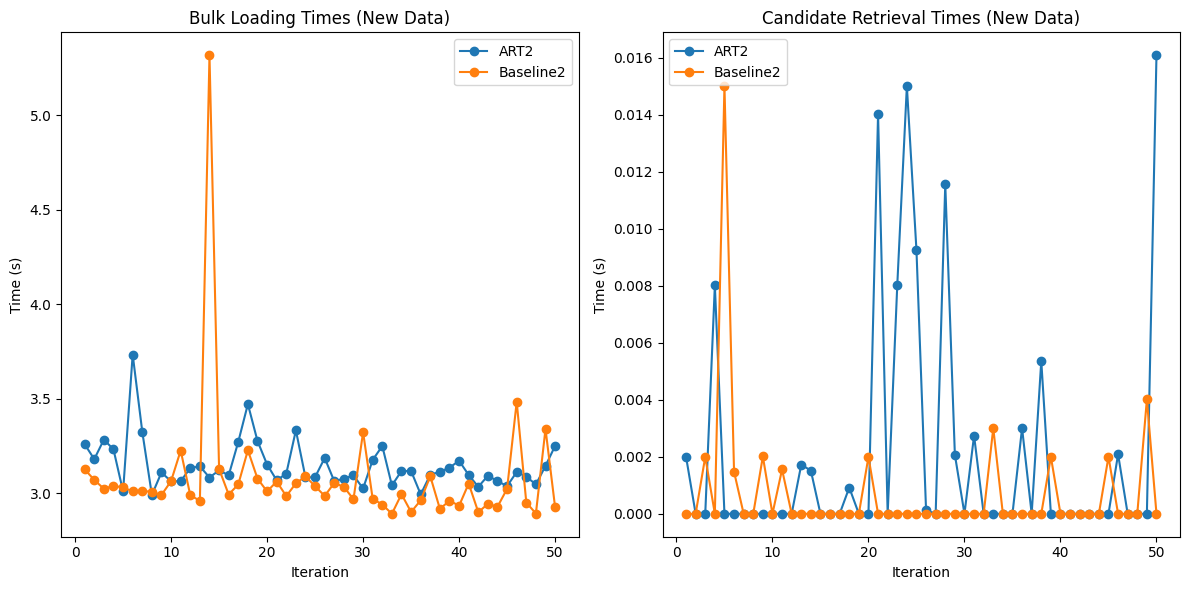

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Load the new CSV files
art_results2 = pd.read_csv("iteration_results_art2.csv")
baseline_results2 = pd.read_csv("iteration_results2.csv")

# # Calculate basic statistics
art_bulk_mean2, art_bulk_std2, art_candidate_mean2, art_candidate_std2 = calculate_statistics(art_results2, "ART2")
baseline_bulk_mean2, baseline_bulk_std2, baseline_candidate_mean2, baseline_candidate_std2 = calculate_statistics(baseline_results2, "Baseline2")

# Perform A/B testing (Paired t-test)
print("A/B Testing Results for new query:")
bulk_t_stat2, bulk_p_value2 = stats.ttest_rel(art_results2["Time_Bulk_Loading"], baseline_results2["Time_Bulk_Loading"])
candidate_t_stat2, candidate_p_value2 = stats.ttest_rel(art_results2["Time_Candidate_Retrieval"], baseline_results2["Time_Candidate_Retrieval"])

print(f"  Bulk Loading - t-statistic: {bulk_t_stat2:.3f}, p-value: {bulk_p_value2:.3e}")
print(f"  Candidate Retrieval - t-statistic: {candidate_t_stat2:.3f}, p-value: {candidate_p_value2:.3e}")

# Interpret the results
if bulk_p_value2 < alpha:
    print("  Bulk Loading: Statistically significant difference.")
else:
    print("  Bulk Loading: No statistically significant difference.")

if candidate_p_value2 < alpha:
    print("  Candidate Retrieval: Statistically significant difference.")
else:
    print("  Candidate Retrieval: No statistically significant difference.")

# Visualization
plt.figure(figsize=(12, 6))

# Bulk Loading Times
plt.subplot(1, 2, 1)
plt.plot(art_results2["Iteration"], art_results2["Time_Bulk_Loading"], label="ART2", marker="o")
plt.plot(baseline_results2["Iteration"], baseline_results2["Time_Bulk_Loading"], label="Baseline2", marker="o")
plt.title("Bulk Loading Times %chocolate%mon%")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

# Candidate Retrieval Times
plt.subplot(1, 2, 2)
plt.plot(art_results2["Iteration"], art_results2["Time_Candidate_Retrieval"], label="ART2", marker="o")
plt.plot(baseline_results2["Iteration"], baseline_results2["Time_Candidate_Retrieval"], label="Baseline2", marker="o")
plt.title("Candidate Retrieval Times %chocolate%mon%")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

plt.tight_layout()
plt.show()